In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Softmax
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import locale
from keras.layers import SimpleRNN

In [14]:
data = pd.read_csv("Danube ammonium level Time Series (1).csv",sep=";")

data = data[['Ammonium']]
data = np.array(data)

locale.setlocale(locale.LC_ALL, 'nl_NL')
for i in range(0,len(data)):
    rep = data[i]
    rep1 = locale.atof(rep[0])
    data[i] = rep1
    
max = data.max()
min = data.min()

train1 = (data[0:251,0] - min)/(max - min)
test1 = (data[252:263,0] - min)/(max - min)

train = np.zeros((251,2))
test = np.zeros((11,2))

for i in range(0,251) :
    train[i,0] = train1[i]
    train[i,1] = (data[i+1,0] - min)/(max - min)

for i in range(0,11) :
    test[i,0] = test1[i]
    test[i,1] = (data[252+i+1,0] - min)/(max - min)

X_train = train[:,0]
Y_train = train[:,1]

X_test = test[:,0]
Y_test = test[:,1]

#On remodèle l'ensemble des données d'entrée
X_train = np.reshape(X_train, (X_train.shape[0],1,1))
X_test = np.reshape(X_test, (X_test.shape[0],1,1))

In [28]:
from keras.layers import SimpleRNN

model = Sequential()
model.add(SimpleRNN(units=50, input_shape=(1,1), return_sequences=True))
model.add(SimpleRNN(units=1))
model.summary()


# compile the model
model.compile(optimizer='Adam',
              loss='mse',
              metrics=['mse'])

# now we just update our model fit call
history = model.fit(X_train, Y_train,
                    epochs=50, # you can set this to a big number!
                    batch_size=10,
                    validation_data = (X_test, Y_test),
                    verbose=1)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_18 (SimpleRNN)   (None, 1, 50)             2600      
                                                                 
 simple_rnn_19 (SimpleRNN)   (None, 1)                 52        
                                                                 
Total params: 2,652
Trainable params: 2,652
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
26/26 [==============================] - 4s 31ms/step - loss: 0.0284 - mse: 0.0284 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 2/50
26/26 [==============================] - 0s 6ms/step - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 3/50
26/26 [==============================] - ETA: 0s - loss: 0.0180 - mse: 0.018 - 0s 6ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 4/50
26/26 [

Test loss     : 0.004380390048027039
Test mse : 0.004380390048027039


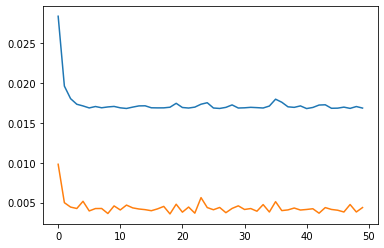

In [30]:
score = model.evaluate(X_test, Y_test, verbose=0)

print('Test loss     :', score[0])
print('Test mse :', score[1])


plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])

,Months;Ammonium
01/01/1996;0,253333
01/02/1996;0,218889
01/03/1996;0,242
01/04/1996;0,134545
01/05/1996;0,113333
...,...
01/08/2017;0,31222
01/09/2017;0,45875
01/10/2017;0,32474
01/11/2017;0,47125
